In [1]:
import requests
import pandas as pd
import re
import numpy as np
import os

import math
import statistics

from bs4 import BeautifulSoup

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0'}

# Import data

In [2]:
df = pd.read_csv('nyc_therapists_cleaned.csv')

In [3]:
df.head(2)

,age_focus,community_focus,description,grad_yr,issues,lang,license_state,mental_health,name,phone,...,therapytype_psychodynamic,therapytype_marital,therapytype_family,therapytype_interpersonal,title_phd,title_LCSW,title_PsyD,title_psychologist,title_LMFT,title_LMHC
0,Adults,None,"""Welcome to Manhattan Mental Health Counseling...",NaN,ADHD\nBehavioral Issues\nCareer Counseling\nCo...,None,004643 New York,Mood Disorders,Manhattan Mental Health Counseling,(212) 960-8626,...,0,0,0,0,0,0,0,0,0,1
1,Adolescents / Teenagers (14 to 19)\nAdults\nEl...,Bisexual Allied\nCancer\nGay Allied\nLesbian A...,"""Why do people seek therapy? Usually it's beca...",1981.0,Anger Management\nAnxiety\nBeing a Mother- or ...,None,026039 New York,None,Ellen S. Daniels,(646) 797-5689,...,1,0,0,1,0,1,0,0,0,0


In [4]:
df.dtypes

age_focus                      object
community_focus                object
description                    object
grad_yr                       float64
issues                         object
lang                           object
license_state                  object
mental_health                  object
name                           object
phone                          object
race_focus                     object
school                         object
sexuality                      object
specialities                   object
therapy_types                  object
title                          object
url                            object
yrs_in_practice                object
zipcode                         int64
yrs_in_practice_range          object
agefocus_toddlers               int64
agefocus_children               int64
agefocus_preteen-tweens         int64
agefocus_teenagers              int64
agefocus_adults                 int64
agefocus_elders                 int64
sexualityfoc

In [27]:
df.shape

(6119, 84)

# Analyse the data and plot some charts

# Therapists' years in practice

In [5]:
df.yrs_in_practice_range.value_counts(dropna=False)

None     1917
10-14     937
05-9      893
20-24     810
15-19     624
30-34     431
0-4       265
25-29     137
35-39      66
40+        39
Name: yrs_in_practice_range, dtype: int64

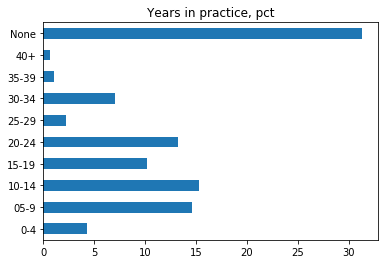

In [28]:
(df.yrs_in_practice_range.value_counts() / 6119 * 100).sort_index().plot(kind='barh', title='Years in practice, pct')

plt.savefig("therapists-yrs-in-practice.pdf")

# Most therapists who put 'none' as their years in practice are relatively young

In [7]:
df['grad_yr_bin'] = pd.cut(df.grad_yr, 10)

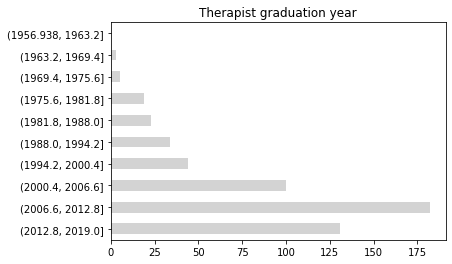

In [8]:
df[df.yrs_in_practice_range == 'None'].grad_yr_bin.value_counts(sort=False).sort_index(ascending=False).plot(kind='barh', 
                                             title='Therapist graduation year', 
                                              color='lightgrey', rot=0)

# Therapists' graduation year

In [9]:
df['grad_yr_bin'] = pd.cut(df.grad_yr, 10)

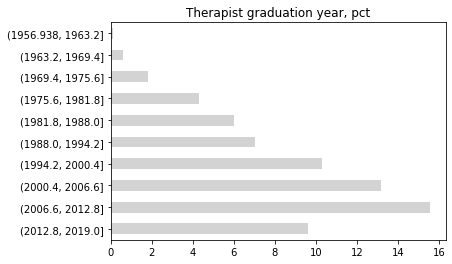

In [29]:
# Dropped NaN from chart
(df.grad_yr_bin.value_counts(sort=False) / 6119 * 100).sort_index(ascending=False).plot(kind='barh', 
                                             title='Therapist graduation year, pct', 
                                             color='lightgrey', rot=0)

plt.savefig("therapists-grad-yr.pdf", bbox_inches='tight')

# Plot race focus

In [11]:
df.shape

(6119, 83)

In [12]:
race_columns = df.columns[df.columns.str.contains("racefocus_")]
df[race_columns].sum()

racefocus_afam                473
racefocus_latino_hispanic     478
racefocus_asian               268
racefocus_pacific_islander     20
racefocus_native_am            17
racefocus_other_races         519
dtype: int64

# Race focus by count

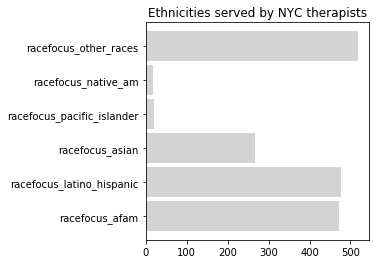

In [13]:
df[race_columns].sum().plot(kind='barh', title="Ethnicities served by NYC therapists", figsize=(4,4), width=0.9,
              color='lightgrey')

# Race focus by pct

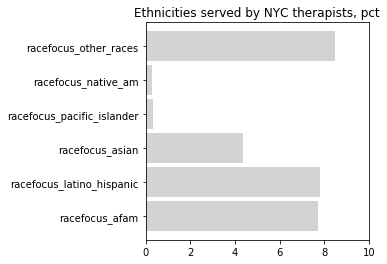

In [30]:
ax = (df[race_columns].sum() / 6119 * 100).plot(kind='barh', title="Ethnicities served by NYC therapists, pct", figsize=(4,4), width=0.9,
              color='lightgrey')

ax.set_xlim(0, 10)
plt.savefig("therapists-race-focus-pct.pdf", bbox_inches='tight')

# How many 'race focus' do therapists have?

In [15]:
df['racefocus_count'] = df[race_columns].sum(axis=1)
df.racefocus_count.value_counts()

0    5049
2     705
1     365
Name: racefocus_count, dtype: int64

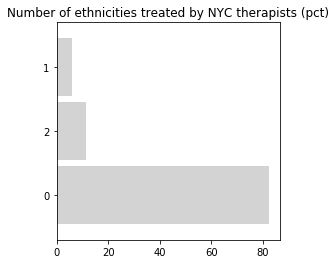

In [16]:
ax = (df.racefocus_count.value_counts() / 6119 * 100).plot(kind='barh', title="Number of ethnicities treated by NYC therapists (pct)", figsize=(4,4), width=0.9,
              color='lightgrey')

plt.savefig("therapists-racefocus-count.pdf", bbox_inches='tight')

# Plot what age groups NYC therapists treat

In [17]:
age_columns = df.columns[df.columns.str.contains("agefocus_")]
df[age_columns].sum()

agefocus_toddlers           449
agefocus_children          1065
agefocus_preteen-tweens    1463
agefocus_teenagers         3563
agefocus_adults            5742
agefocus_elders            3051
dtype: int64

## Age focus by pct

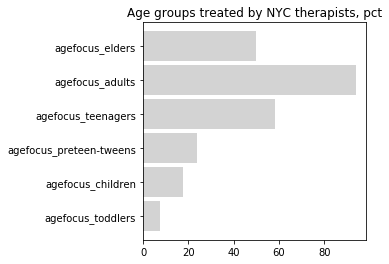

In [31]:
ax = (df[age_columns].sum() / 6119 * 100).plot(kind='barh', title="Age groups treated by NYC therapists, pct", figsize=(4,4), width=0.9,
              color='lightgrey')

plt.savefig("therapists-age-focus.pdf", bbox_inches='tight')

# Chart what issues NYC therapists treat

In [19]:
issue_columns = df.columns[df.columns.str.contains("issues_")]
df[issue_columns].sum()

issues_family           3303
issues_anxiety          2340
issues_alcohol          1183
issues_drug              884
issues_career           1659
issues_relationship     4370
issues_stress           2395
issues_trauma           2906
issues_divorce          3068
issues_sexabuse         1647
issues_domesticabuse     894
dtype: int64

## Age focus by pct

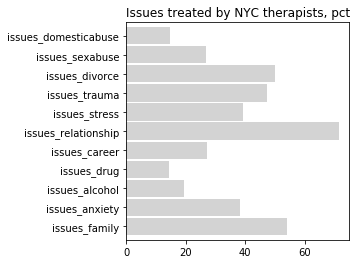

In [32]:
ax = (df[issue_columns].sum() / 6119 * 100).plot(kind='barh', title="Issues treated by NYC therapists, pct", figsize=(4,4), width=0.9,
              color='lightgrey')

plt.savefig("therapists-issues.pdf", bbox_inches='tight')

# Chart what specialities NYC therapists have

In [21]:
sp_columns = df.columns[df.columns.str.contains("specialities_")]
df[sp_columns].sum()

specialities_pregnancy         80
specialities_addiction        440
specialities_stress           186
specialities_sexabuse          57
specialities_relationship    2797
specialities_women            160
specialities_trauma            80
dtype: int64

## Chart by pct

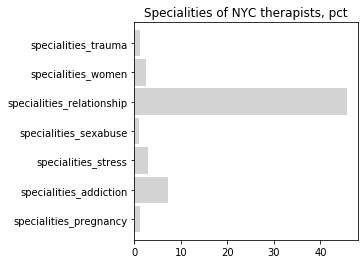

In [33]:
ax = (df[sp_columns].sum() / 6119 * 100).plot(kind='barh', title="Specialities of NYC therapists, pct", figsize=(4,4), width=0.9,
              color='lightgrey')

plt.savefig("therapists-specialities.pdf", bbox_inches='tight')

# Chart sexual orientations treated by NYC therapists

In [23]:
sex_columns = df.columns[df.columns.str.contains("sexualityfocus")]
df[sex_columns].sum()

sexualityfocus_bisexual    2684
sexualityfocus_gay         2692
sexualityfocus_lesbian     2680
dtype: int64

## Chart by pct

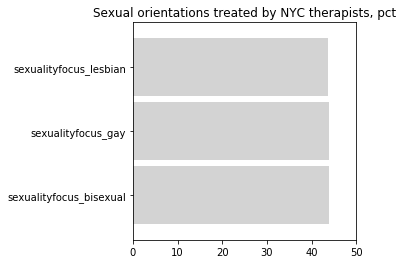

In [34]:
ax = (df[sex_columns].sum() / 6119 * 100).plot(kind='barh', title="Sexual orientations treated by NYC therapists, pct", figsize=(4,4), width=0.9,
              color='lightgrey')

ax.set_xlim(0, 50)
plt.savefig("therapists-sexuality.pdf", bbox_inches='tight')

# Chart therapy types used by NYC therapists, by pct

In [25]:
type_columns = df.columns[df.columns.str.contains("therapytype_")]
df[type_columns].sum()

therapytype_cbt               3308
therapytype_psychoanalytic    1771
therapytype_psychodynamic     4243
therapytype_marital           2154
therapytype_family            2743
therapytype_interpersonal     2567
dtype: int64

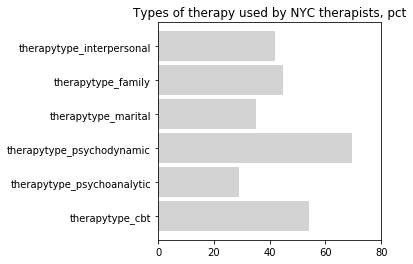

In [35]:
ax = (df[type_columns].sum() / 6119 * 100).plot(kind='barh', title="Types of therapy used by NYC therapists, pct", figsize=(4,4), width=0.9,
              color='lightgrey')

ax.set_xlim(0, 80)
plt.savefig("therapists-therapytype.pdf", bbox_inches='tight')

# Chart the breakdown of therapy types by years in practice

In [67]:
yrs_range = df.yrs_in_practice_range.unique()
yrs_range

array(['None', '20-24', '10-14', '05-9', '25-29', '30-34', '15-19', '0-4',
       '35-39', '40+'], dtype=object)

In [77]:
type_columns

Index(['therapytype_cbt', 'therapytype_psychoanalytic',
       'therapytype_psychodynamic', 'therapytype_marital',
       'therapytype_family', 'therapytype_interpersonal'],
      dtype='object')

In [86]:
df.groupby('grad_yr_bin')[type_columns].sum()

,therapytype_cbt,therapytype_psychoanalytic,therapytype_psychodynamic,therapytype_marital,therapytype_family,therapytype_interpersonal
grad_yr_bin,,,,,,
"(1956.938, 1963.2]",1,5,6,3,4,3
"(1963.2, 1969.4]",11,14,31,20,20,16
"(1969.4, 1975.6]",34,56,90,65,69,52
"(1975.6, 1981.8]",103,97,188,142,154,121
"(1981.8, 1988.0]",135,140,280,175,189,180
"(1988.0, 1994.2]",171,157,308,185,214,204
"(1994.2, 2000.4]",299,213,454,254,300,270
"(2000.4, 2006.6]",435,231,576,279,353,337
"(2006.6, 2012.8]",585,238,669,295,417,406


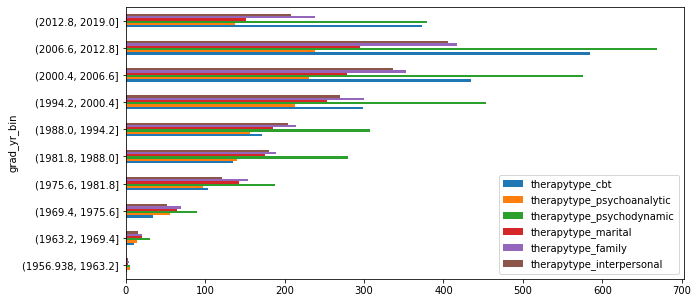

In [91]:
df.groupby('grad_yr_bin')[type_columns].sum().plot(kind='barh', figsize=(10,5))

# Problem -- some therapists list multiple therapy types, so if I set them all equal to 100, the chart becomes inaccurate and misleading

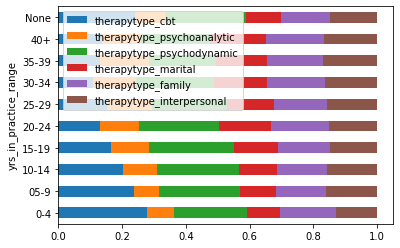

In [95]:
counts = df.groupby('yrs_in_practice_range')[type_columns].sum()
counts.div(counts.sum(axis=1), axis=0).plot(kind='barh', stacked=True)

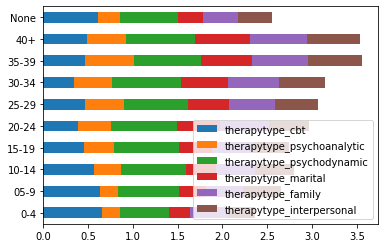

In [101]:
counts = df.groupby('yrs_in_practice_range')[type_columns].sum()
counts.div(df.yrs_in_practice_range.value_counts(), axis=0).plot(kind='barh', stacked=True)

# Instead, make small multiples

* Each bar shows the percentage of therapists in each bin that practice that particular type of therapy

In [104]:
type_columns

Index(['therapytype_cbt', 'therapytype_psychoanalytic',
       'therapytype_psychodynamic', 'therapytype_marital',
       'therapytype_family', 'therapytype_interpersonal'],
      dtype='object')

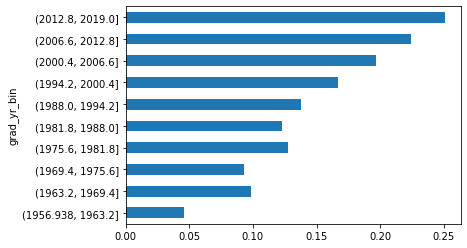

In [106]:
# One example
counts = df.groupby('grad_yr_bin')[type_columns].sum()
combined = counts.div(counts.sum(axis=1), axis=0)
combined['therapytype_cbt'].plot(kind='barh', stacked=True)

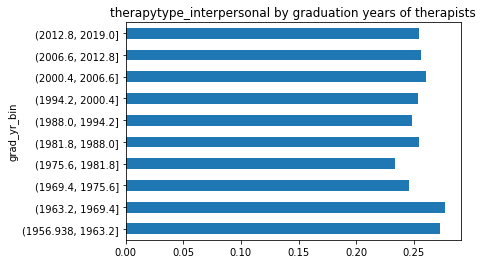

In [109]:
for therapy in type_columns:
    counts = df.groupby('grad_yr_bin')[type_columns].sum()
    combined = counts.div(counts.sum(axis=1), axis=0)
    combined[therapy].plot(kind='barh', stacked=True, title=f'{therapy} by graduation years of therapists')
    plt.savefig(f"therapists-{therapy}-by-gradyear.pdf", bbox_inches='tight')

# How to drop None values from the chart

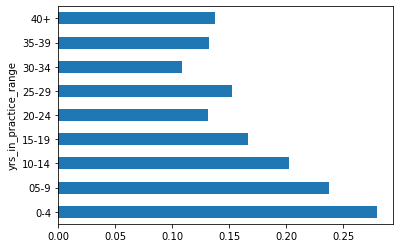

In [98]:
combined['therapytype_cbt'].drop('None').plot(kind='barh', stacked=True)

In [ ]:
df.groupby('grad_yr_bin')[type_columns].sum().plot(kind='barh', figsize=(10,5))